LotArea means Lot size in square feet of a house. This should be a important feature since the larger the house, the higher the price should be naively. So I come up with an approach to change the question to be predict house price per square feet. Then, my y becomes house price/ LotArea and my X need to remove the LotArea feature. I trained Lasso on this new X and y. The performance is not improved so I didn’t continue this method.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
raw_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
selected = raw_data.loc[:,['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','SalePrice']]

In [8]:
selected.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,250000


/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/fanwen

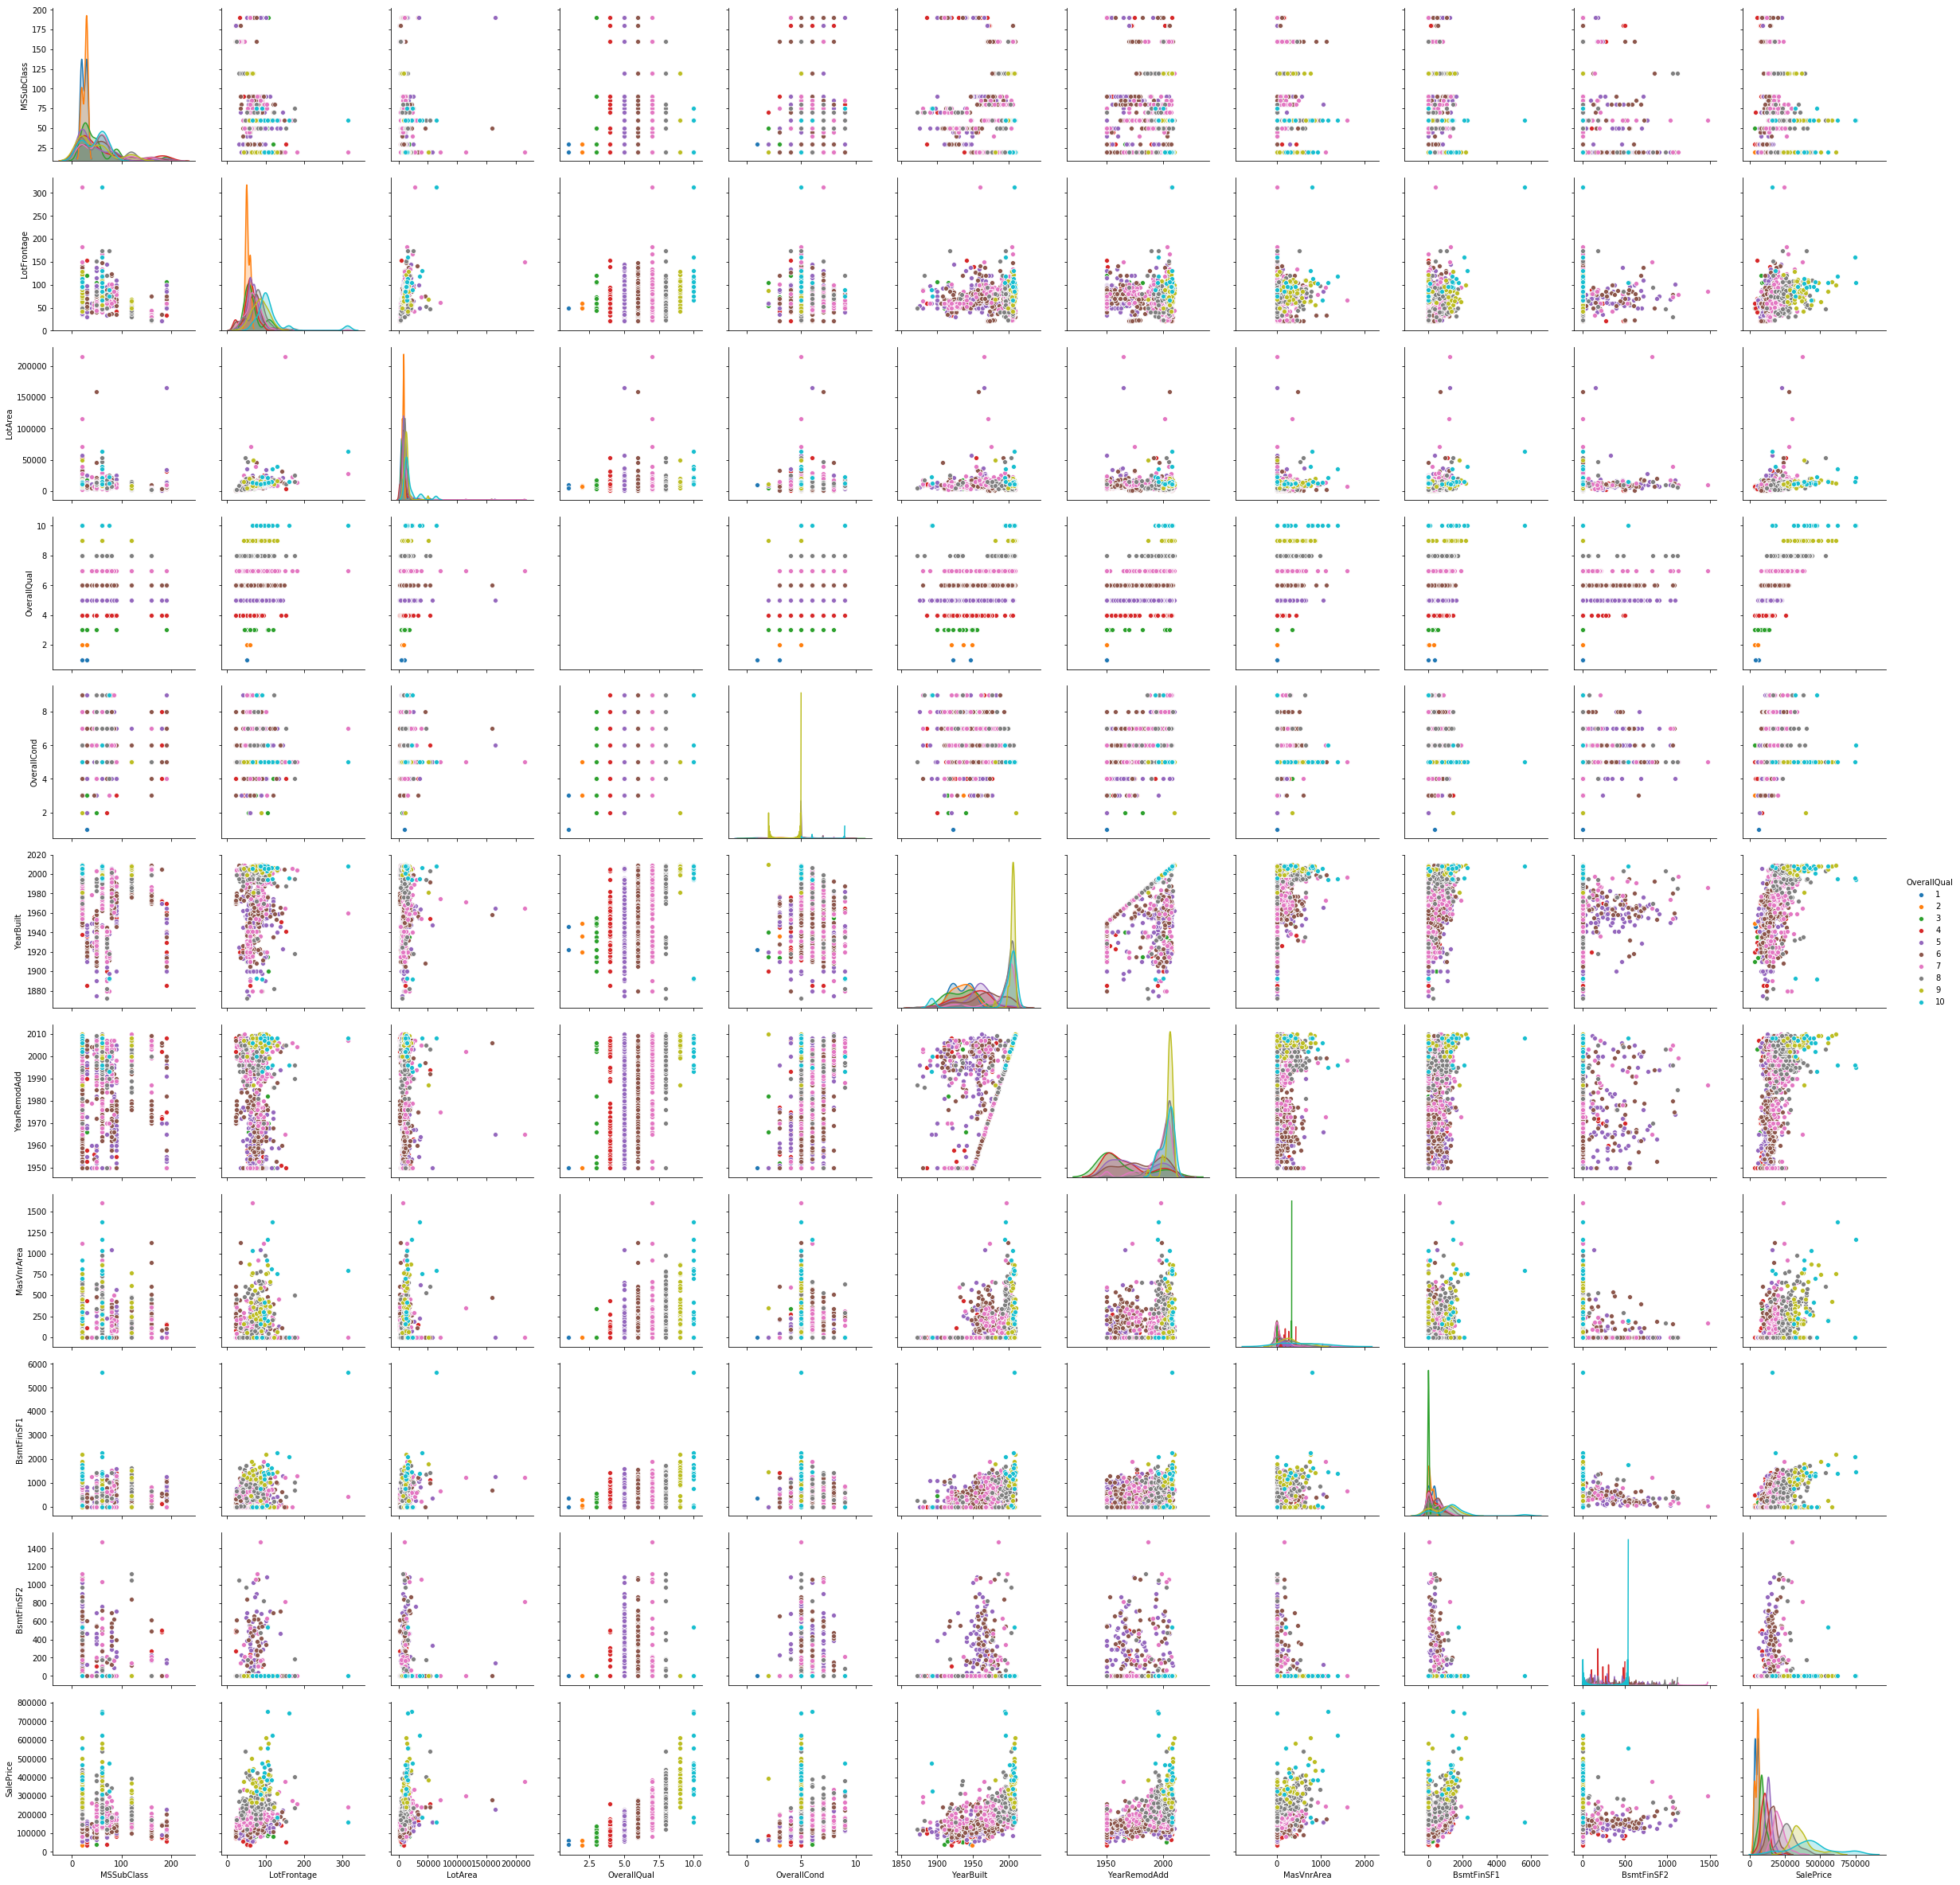

In [10]:
sns.pairplot(selected,height=3,hue = 'OverallQual')

## change the question to predict the price of each square feet

In [37]:
raw_data['PricePerFeet'] = np.log(raw_data.SalePrice/raw_data.LotArea)

(array([  1.,   2.,   0.,   0.,   1.,   2.,   0.,   0.,   2.,   6.,   7.,
          6.,  13.,  10.,  22.,  31.,  51.,  86., 127., 154., 186., 174.,
        145., 119.,  76.,  70.,  38.,  23.,  24.,  22.,  20.,  22.,  13.,
          6.,   1.]),
 array([0.3296209 , 0.45042937, 0.57123783, 0.6920463 , 0.81285477,
        0.93366324, 1.05447171, 1.17528018, 1.29608865, 1.41689712,
        1.53770558, 1.65851405, 1.77932252, 1.90013099, 2.02093946,
        2.14174793, 2.2625564 , 2.38336486, 2.50417333, 2.6249818 ,
        2.74579027, 2.86659874, 2.98740721, 3.10821568, 3.22902415,
        3.34983261, 3.47064108, 3.59144955, 3.71225802, 3.83306649,
        3.95387496, 4.07468343, 4.1954919 , 4.31630036, 4.43710883,
        4.5579173 ]),
 <a list of 35 Patch objects>)

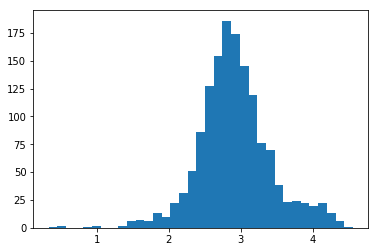

In [39]:
plt.hist(raw_data.PricePerFeet,bins = 35)

In [40]:
selected = raw_data.loc[:,['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','SalePrice','PricePerFeet']]

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/fanwen

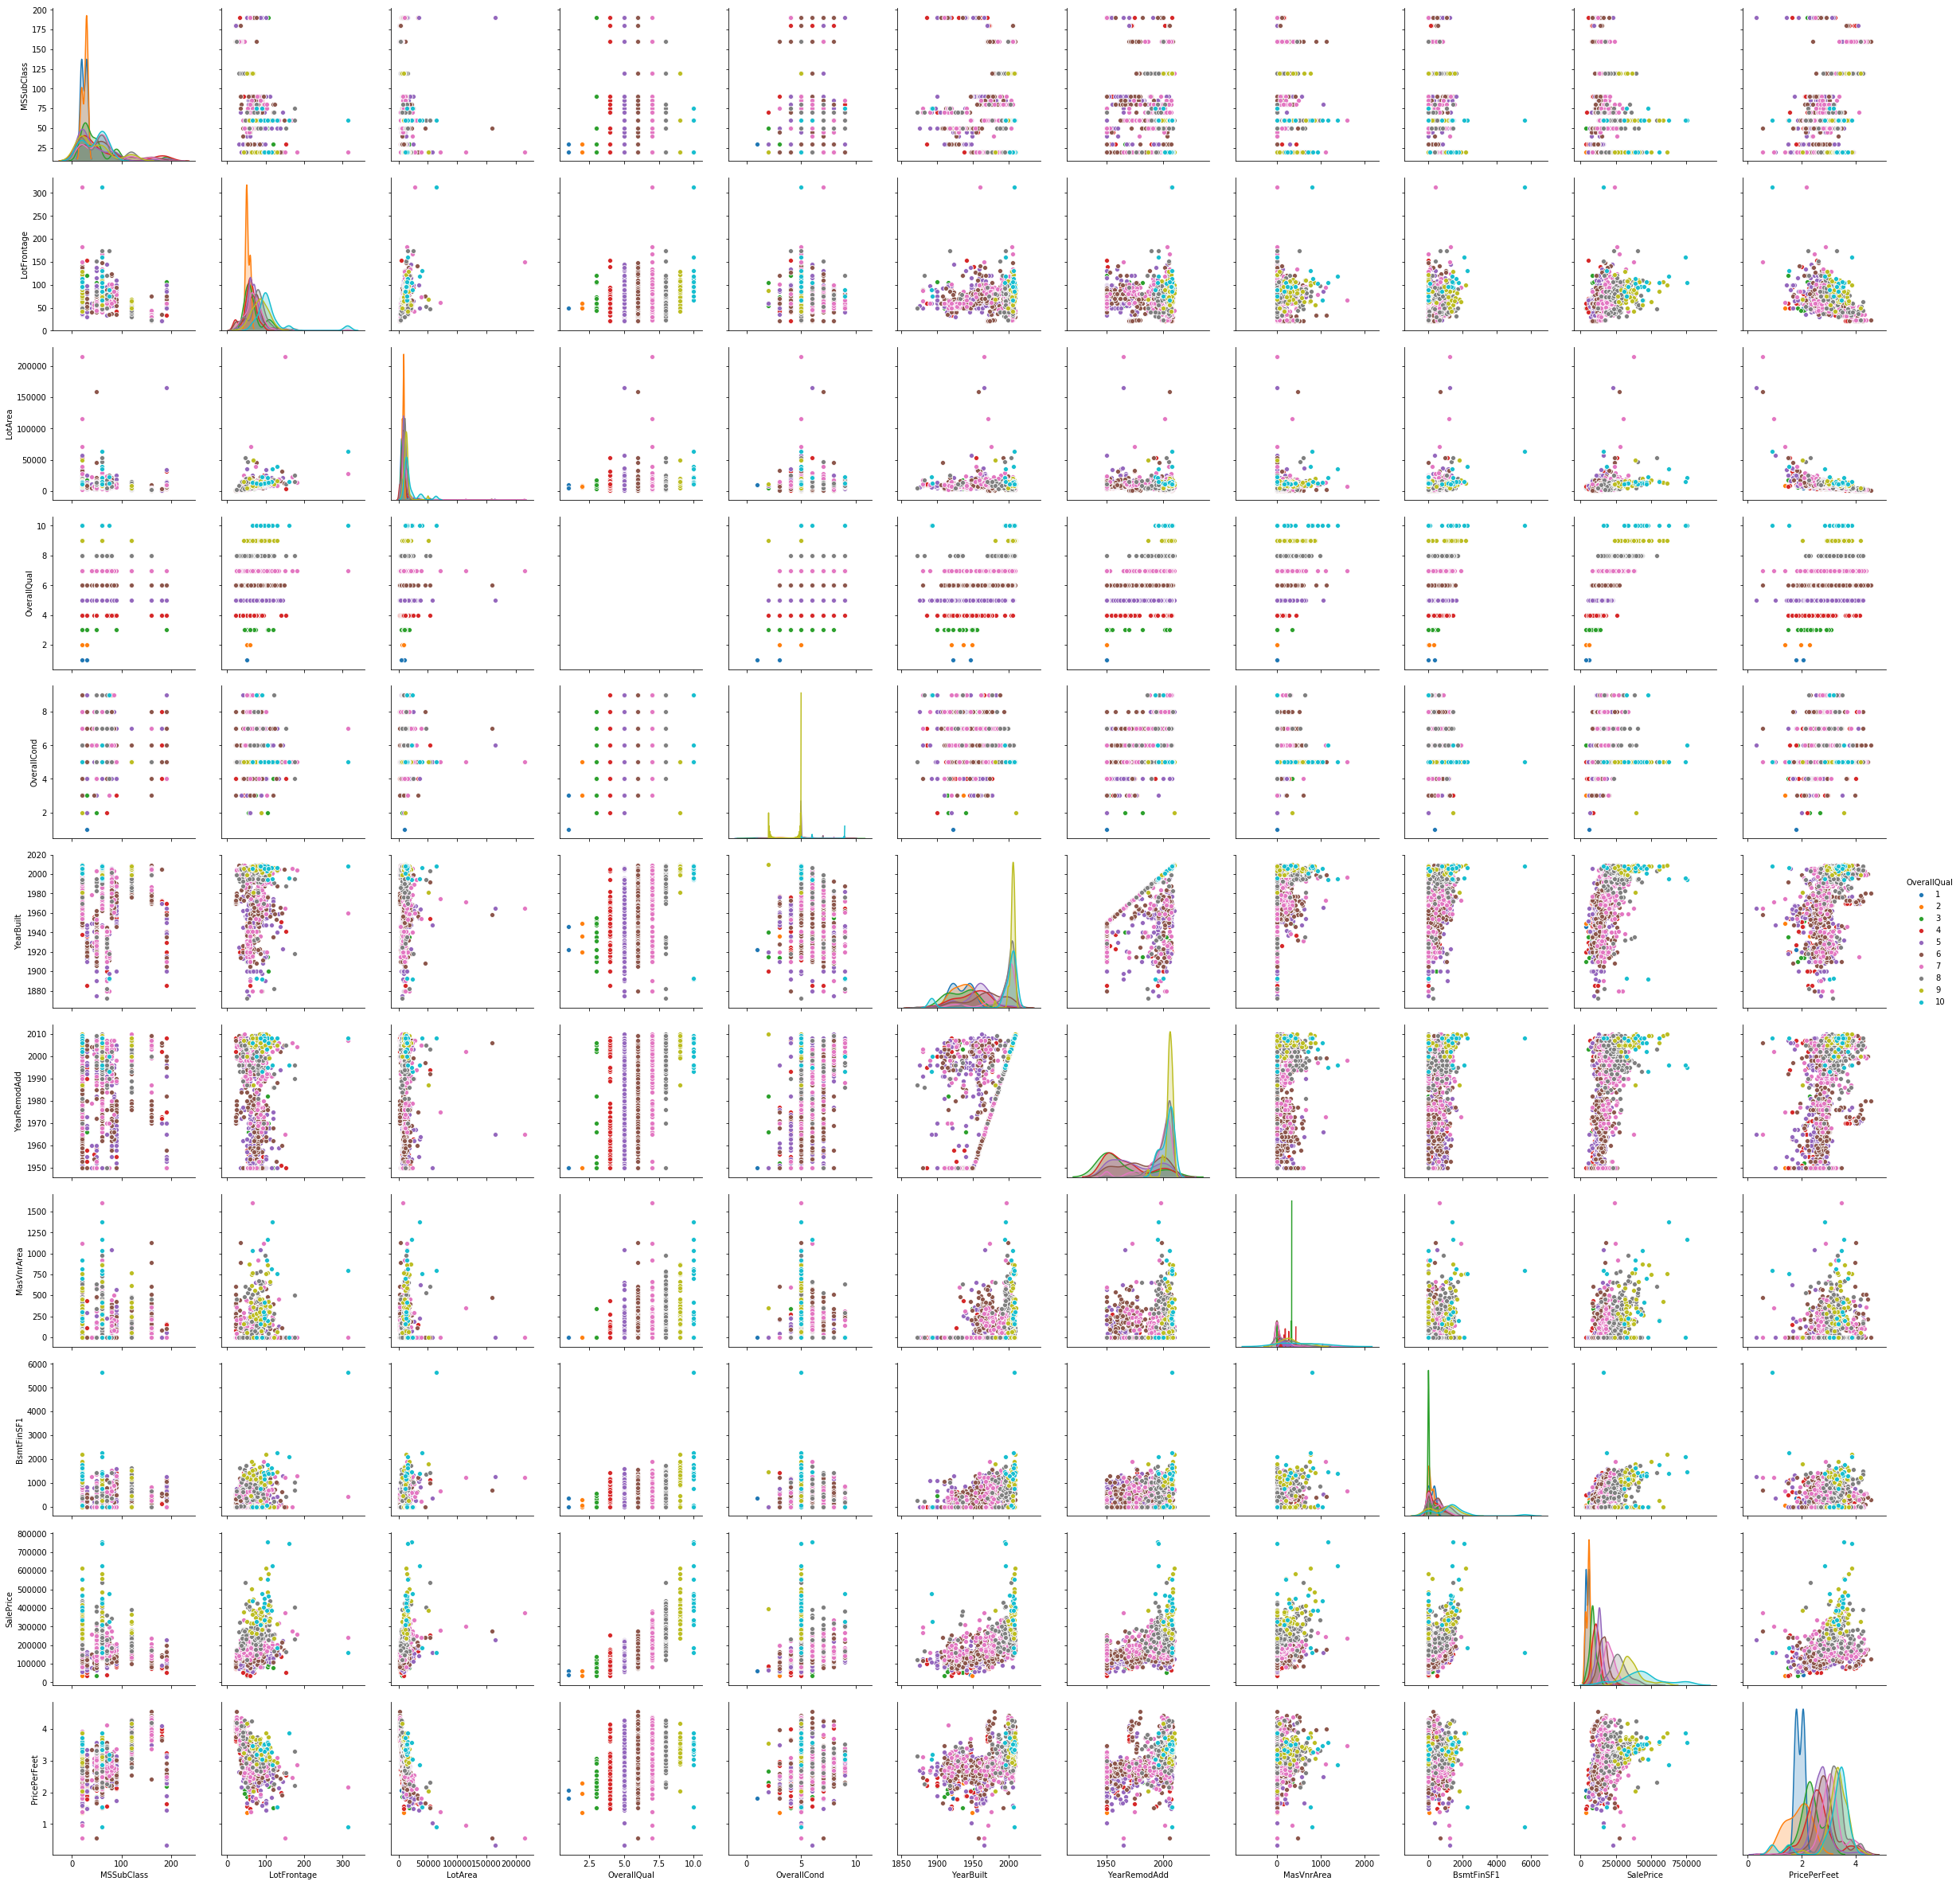

In [42]:
sns.pairplot(selected,height=3,hue = 'OverallQual')

## Redo Lasso with cleaned data and change y

In [43]:
clean_data = pd.read_csv('clean_data.csv')
y=clean_data['SalePrice']
clean_data=clean_data.drop(['SalePrice'],axis=1) #drop the y in clean_data
X = clean_data.iloc[:,1:] # drop the id column
y_loged = np.log(y/X.LotArea) # log transform y

Text(0.5,1,'Distribution of y after X and y filted')

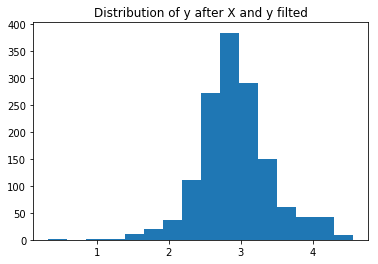

In [47]:
# remove X outliers. 
X_filted = X[X['LotFrontage'] < 129]
y_filted = y_loged[X['LotFrontage'] < 129]
X_filted = X_filted.drop(['LotArea'],axis=1) #drop the LotArea in X because it's considered part of y
plt.hist(y_filted,bins=16)
plt.title('Distribution of y after X and y filted')

## fit into lasso

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
X_train, X_test, y_train, y_test = train_test_split(X_filted, y_filted, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
clf = Lasso(random_state=42)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)

mse = mean_squared_error(y_test, y_test_pred)
sqrt(mse)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


0.5030524700097734

In [58]:
from sklearn.model_selection import GridSearchCV
parameters = { 'max_iter':[3,5,10,50,100],'alpha':[0.001,0.01,0.1,1, 10,100,1000]}
ls = Lasso(random_state=42)
clf = GridSearchCV(ls, parameters, cv=5)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

In [59]:
clf.best_params_

{'alpha': 0.01, 'max_iter': 5}

In [60]:
mse_test = mean_squared_error(y_test, y_test_pred)
sqrt(mse_test)

0.27444189034191757